In [1]:
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Q8 2014

To find the straight line which best approximates these points and passes through tht mean we will find the principal componets of the data. The principal componetns of a matrix are the eigenvectors of the covarience matrix. Principle componets have an interesting relationship with the singular value decomposition. Let $X$ be a matrix of mean centered data, we can perform the SVD 

$$X = U \Sigma V^T$$


then we can defind our covarience as 

$$C = X^T X$$

We can perform SVD on the covarience matrix

$$X^TX = V \Sigma U^T U \Sigma V^T = V \Sigma^2 V^T$$

This first row of the $V^T$ matrix from SVD of our mean centered data matrix represents the direction of most variation which is like the line of best fit. 

In [2]:
x = np.array([1.1, 1.4, 2.2, 2.5])
y = np.array([-0.8, -0.7, 0.0, 0.3])
z = np.array([1.1, 1.6, 1.6, 2.0])

data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perform SVD on mean centered data
datamean = data.mean(axis=0)
_, _, vv = np.linalg.svd(data - datamean)

# Draw line and add back mean
linepts = vv[0] * np.mgrid[-3:3:2j][:, np.newaxis]
linepts += datamean

<IPython.core.display.Javascript object>


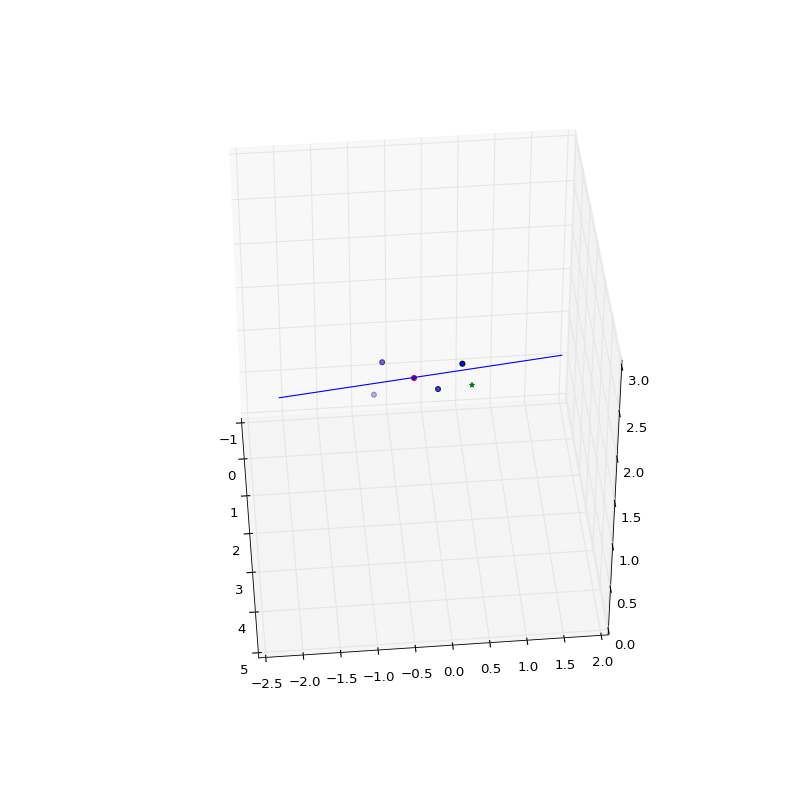

In [3]:
test_point = np.array([1.7, 0.5, 1.4])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*data.T)
ax.scatter(*test_point, color='g', marker="*")
ax.scatter(*datamean, color='r')
ax.plot(*linepts.T)

Now that we have a best fit vector we can calculate a that is perpedicular and passes through the mean

In [4]:
# plane equation a*x+b*y+c*z+d=0
d = -datamean.dot(vv[0])
xx, yy = np.meshgrid(np.mgrid[-1:4:20j], np.mgrid[-3:3:20j])
zz = (-vv[0][0]/d * xx - vv[0][1]/d * yy - d/d) * 1. /(vv[0][2]/d)

<IPython.core.display.Javascript object>


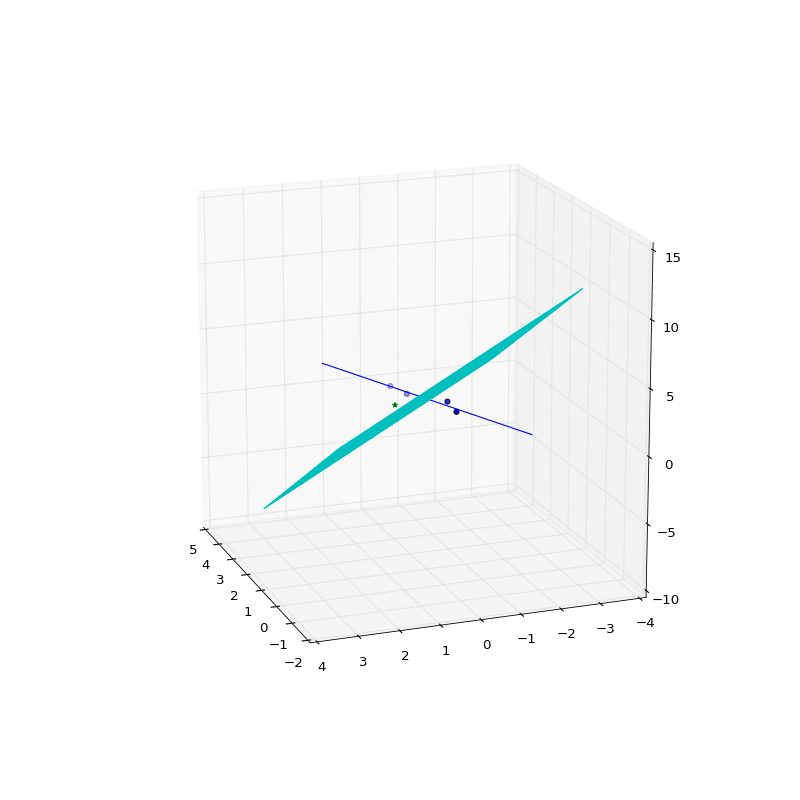

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 155)
ax.scatter(*data.T)
ax.scatter(*test_point, color='g', marker="*")
ax.scatter(*datamean, color='r')
ax.plot(*linepts.T)
ax.plot_wireframe(xx,yy,zz, color='c')

Note that the plane might not appear perpendicular because of the aspect ratio of the axis but it is infact because of how we defined it.

We can see that two groups form. Group one is (1.1, -0.8, 1.1), (1.4, -0.7, 1.6) and group two is (2.2, 0.0, 1.6), (2.5, 0.3, 2.0). Based on our plane the test point of (1.7, 0.5, 1.4) would be placed in group two. 